# Data Cleaning & Engineering

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('egphotelbookings.csv')

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
data.sample(5)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
21256,21256,Renaissance Hotel,0,31,2019,February,8,19,2,3,...,G,0,No Deposit,241.0,NaN,0,Transient,76.38,0,2
43637,43637,JW Marriott Hotel,1,37,2018,September,39,21,1,3,...,A,0,No Deposit,9.0,NaN,0,Transient,145.80,0,2
71670,71670,JW Marriott Hotel,1,111,2017,July,28,9,2,3,...,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0
98322,98322,JW Marriott Hotel,0,126,2019,September,39,23,2,3,...,D,0,No Deposit,9.0,NaN,0,Transient,129.60,0,2
77720,77720,JW Marriott Hotel,0,6,2018,September,39,24,0,1,...,A,0,No Deposit,20.0,NaN,0,Transient,77.00,0,0


In [ ]:
# Overviewing our data columns
data.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
# Looking at dtypes to see if we can perform any conversions
data.dtypes

Unnamed: 0                          int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# https://sparkbyexamples.com/pandas/count-nan-values-in-pandas/#:~:text=If%20we%20want%20to%20count,values%20in%20the%20entire%20DataFrame.
data.isna().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
len(data)

119390

In [ ]:
# from both cells above, we can see that the company column is almost empty so we can safely remove it from our data
data.drop('company', axis=1, inplace=True)

In [ ]:
data.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
# filling all missing values with 0 instead of NaN
data = data.dropna()

In [ ]:
# It appaers there are no duplicated rows
data.duplicated().sum()

0

In [ ]:
# For machine learning which may need encoding the categorical variables into numbers(labels)
df_encoded = data

In [ ]:
# https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_encoded['arrival_date_month'] = label_encoder.fit_transform(df_encoded['arrival_date_month'])
df_encoded['meal'] = label_encoder.fit_transform(df_encoded['meal'])
df_encoded['country'] = label_encoder.fit_transform(df_encoded['country'])
df_encoded['distribution_channel'] = label_encoder.fit_transform(df_encoded['distribution_channel'])
df_encoded['reserved_room_type'] = label_encoder.fit_transform(df_encoded['reserved_room_type'])
df_encoded['assigned_room_type'] = label_encoder.fit_transform(df_encoded['assigned_room_type'])
df_encoded['deposit_type'] = label_encoder.fit_transform(df_encoded['deposit_type'])
df_encoded['customer_type'] = label_encoder.fit_transform(df_encoded['customer_type'])

In [ ]:
df_encoded.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,3,Renaissance Hotel,0,13,2018,5,27,1,0,1,...,0,0,0,0,304.0,0,2,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,5,27,1,0,2,...,0,0,0,0,240.0,0,2,98.0,0,1
5,5,Renaissance Hotel,0,14,2018,5,27,1,0,2,...,0,0,0,0,240.0,0,2,98.0,0,1
7,7,Renaissance Hotel,0,9,2018,5,27,1,0,2,...,2,2,0,0,303.0,0,2,103.0,0,1
8,8,Renaissance Hotel,1,85,2018,5,27,1,0,3,...,0,0,0,0,240.0,0,2,82.0,0,1


In [ ]:
# Looking at the data stats to see what can be used in binning (if we will need it in plots)
data['agent'].describe()

count    102894.000000
mean         86.545532
std         110.714259
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [ ]:
data['adr'].describe()

count    102894.000000
mean        104.679911
std          50.021697
min          -6.380000
25%          73.000000
50%          96.300000
75%         127.800000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
data['lead_time'].describe()

count    102894.000000
mean        111.740092
std         107.681013
min           0.000000
25%          26.000000
50%          79.000000
75%         169.000000
max         629.000000
Name: lead_time, dtype: float64

In [ ]:
# https://towardsdatascience.com/how-to-bin-numerical-data-with-pandas-fe5146c9dc55
# Binning (Uncomment if needed for plots)
# data['lead_time_bin'] = pd.cut(data['lead_time'], [0, 100, 200, 300, 400, 500, 600])

In [ ]:
# # Combine arrival date columns into a single column
# data['arrival_date'] = data.apply(lambda row: pd.to_datetime(f"{int(row['arrival_date_year'])}-{int(row['arrival_date_month'])}-{int(row['arrival_date_day_of_month'])}", format='%Y-%m-%d', errors='coerce') + pd.offsets.Week(row['arrival_date_week_number']-1), axis=1)

# # Drop rows with invalid dates
# data.dropna(subset=['arrival_date'], inplace=True)

# # Drop the original arrival date columns
# data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [ ]:
# data['arrival_date'].count()

In [ ]:
# Need to write the cleaned csv file so we can make a schema out of it for the machine learning part later
data.to_csv('cleaned.csv', index=False)

# Insights

## Insight 1: Discovering each room type and their corresponding average ADR

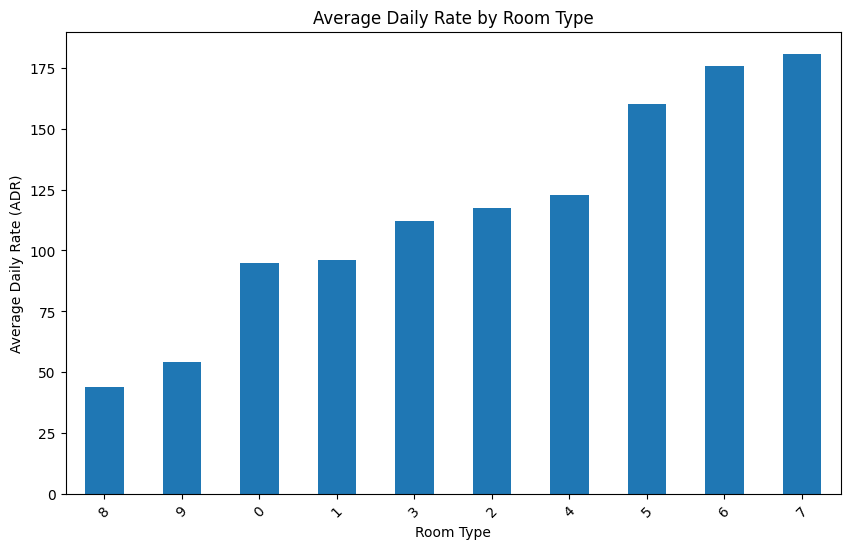

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

avg_adr_by_room_type = data.groupby('assigned_room_type')['adr'].mean()

# Sort the room types based on their average daily rate
avg_adr_by_room_type = avg_adr_by_room_type.sort_values()

# Plotting the average daily rate by room type
plt.figure(figsize=(10, 6))
avg_adr_by_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate by Room Type')
plt.xticks(rotation=45)
plt.show()

Without knowing much about what these numbers indicate in terms of room type, we can infer that types 5,6 & 7 are likely the more luxurious options.

## Insight 2:

The correlation between the reserved room type and the assigned room type for each hotel. A high correlation indicates when a room type is reserved, it is highly likely to be assigned. Both hotels are evenly matched in this department.

In [ ]:
correlation_renaissance = data[data['hotel'] == 'Renaissance Hotel']['reserved_room_type'].corr(data[data['hotel'] == 'Renaissance Hotel']['assigned_room_type'])

correlation_jw_marriott = data[data['hotel'] == 'JW Marriott Hotel']['reserved_room_type'].corr(data[data['hotel'] == 'JW Marriott Hotel']['assigned_room_type'])

print('Renaissance Hotel', correlation_renaissance)
print('JW Marriott Hotel', correlation_jw_marriott)

Renaissance Hotel 0.8347711765404134
JW Marriott Hotel 0.8200234269714104


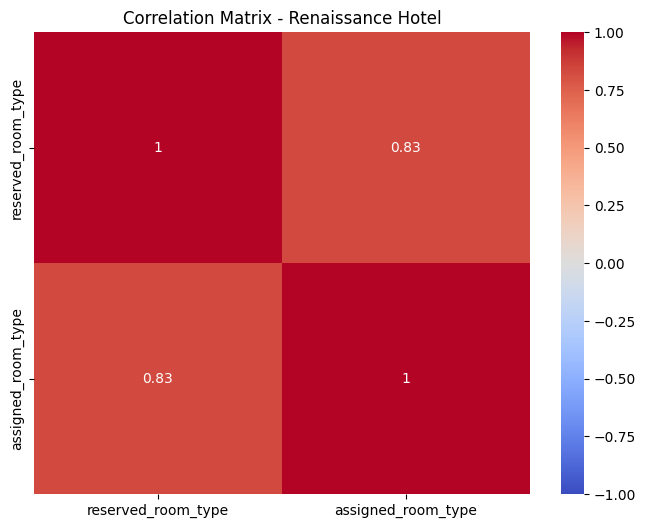

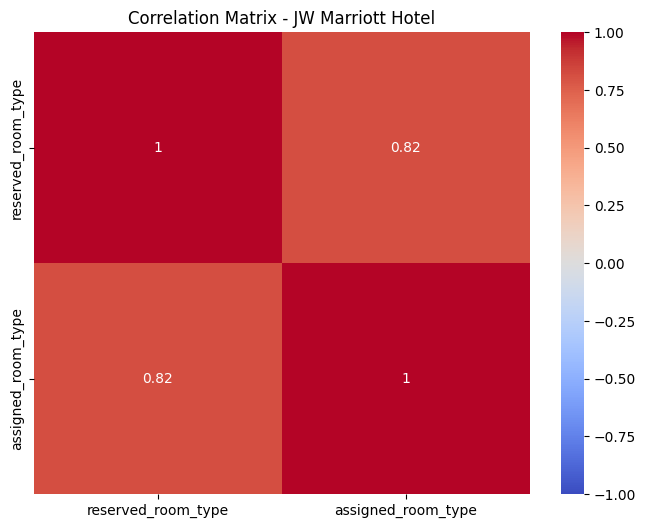

In [ ]:
import seaborn as sns
renaissance_data = data[data['hotel'] == 'Renaissance Hotel']
jw_marriott_data = data[data['hotel'] == 'JW Marriott Hotel']

# Select relevant columns for correlation analysis
renaissance_corr_data = renaissance_data[['reserved_room_type', 'assigned_room_type']]
jw_marriott_corr_data = jw_marriott_data[['reserved_room_type', 'assigned_room_type']]

# Calculate correlation matrices
renaissance_corr_matrix = renaissance_corr_data.corr()
jw_marriott_corr_matrix = jw_marriott_corr_data.corr()

# Create a correlation matrix plot for Renaissance Hotel
plt.figure(figsize=(8, 6))
sns.heatmap(renaissance_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Renaissance Hotel')
plt.show()

# Create a correlation matrix plot for JW Marriott Hotel
plt.figure(figsize=(8, 6))
sns.heatmap(jw_marriott_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - JW Marriott Hotel')
plt.show()

## Insight 3:

How number of bookings change throughout a year: best performing months for business? Years better than others?

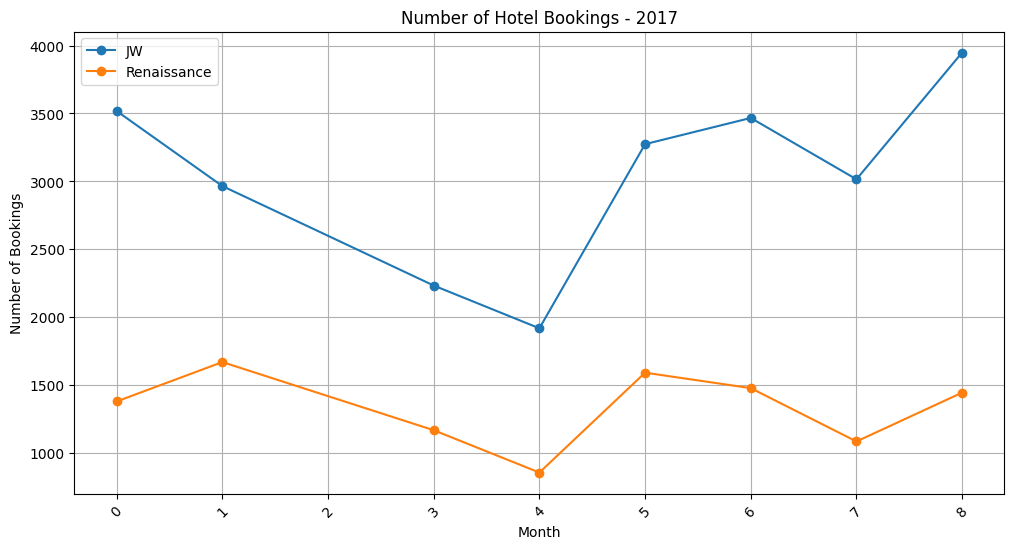

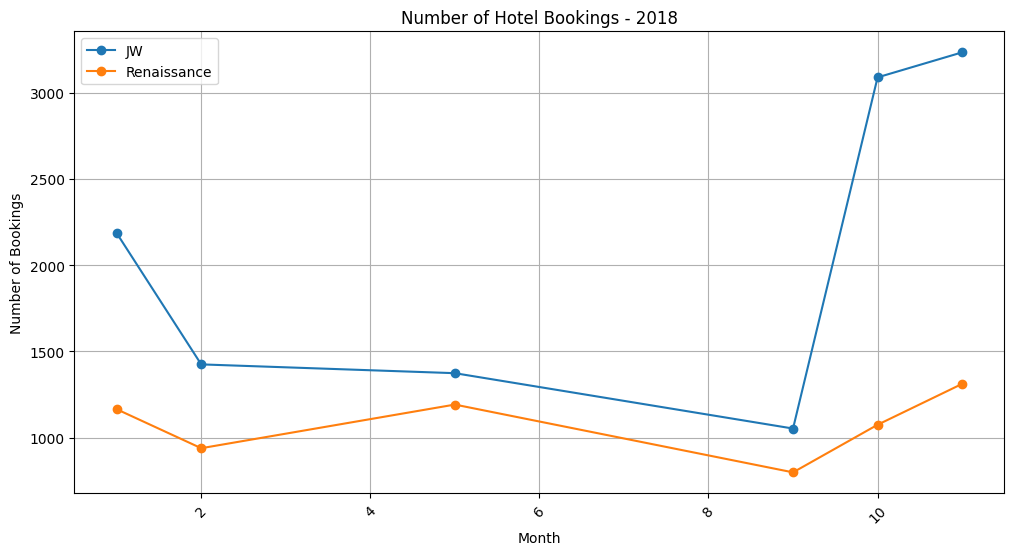

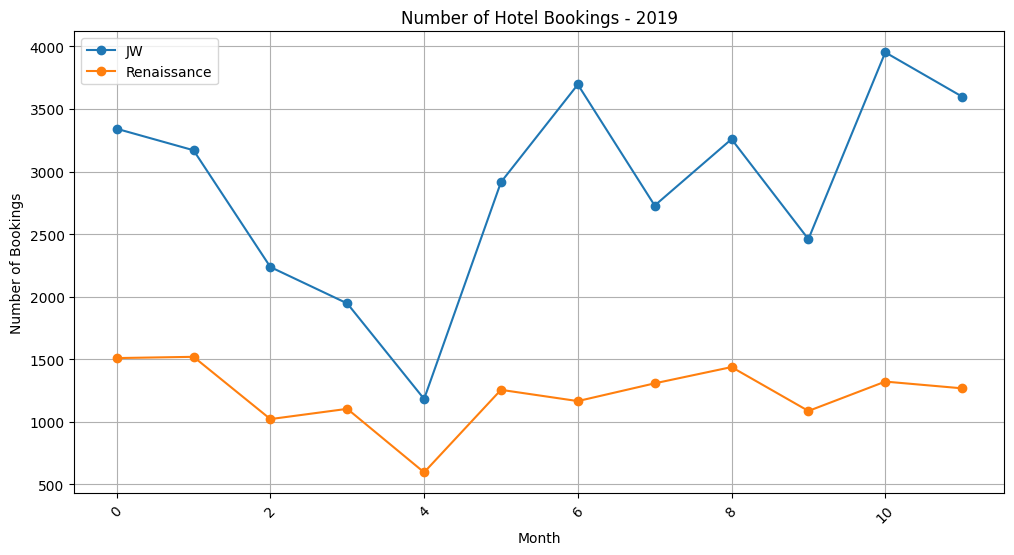

In [ ]:
# Group the data by arrival year, month, and hotel to calculate the number of bookings
seasonal_data = data.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).size().reset_index(name='booking_count')

# Get the unique years in the dataset
years = seasonal_data['arrival_date_year'].unique()

# Create a line chart for each year
for year in years:
    # Filter the data for each hotel
    JW_year_data = seasonal_data[(seasonal_data['arrival_date_year'] == year) & (seasonal_data['hotel'] == 'JW Marriott Hotel')]
    Renaissance_year_data = seasonal_data[(seasonal_data['arrival_date_year'] == year) & (seasonal_data['hotel'] == 'Renaissance Hotel')]

    # Create a line plot for the current year
    plt.figure(figsize=(12, 6))
    plt.plot(JW_year_data['arrival_date_month'], JW_year_data['booking_count'], marker='o', label ='JW')
    plt.plot(Renaissance_year_data['arrival_date_month'], Renaissance_year_data['booking_count'], marker='o', label ='Renaissance')
    plt.xlabel('Month')
    plt.ylabel('Number of Bookings')
    plt.title(f'Number of Hotel Bookings - {year}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

JW has more bookings across the board. It's clearly the more popular hotel of the 2.

Furthermore, we see a sharp decline during Winter months up until around early spring, that is when a spike in reservations emerge again.

It also seems that 2018 held a noticeable decrease in reservations, which 2019 made up for with an overall increase greater than the 2 previous years.

## Insight 4:

Discovering the average number of special requests for each customer type for both hotels.

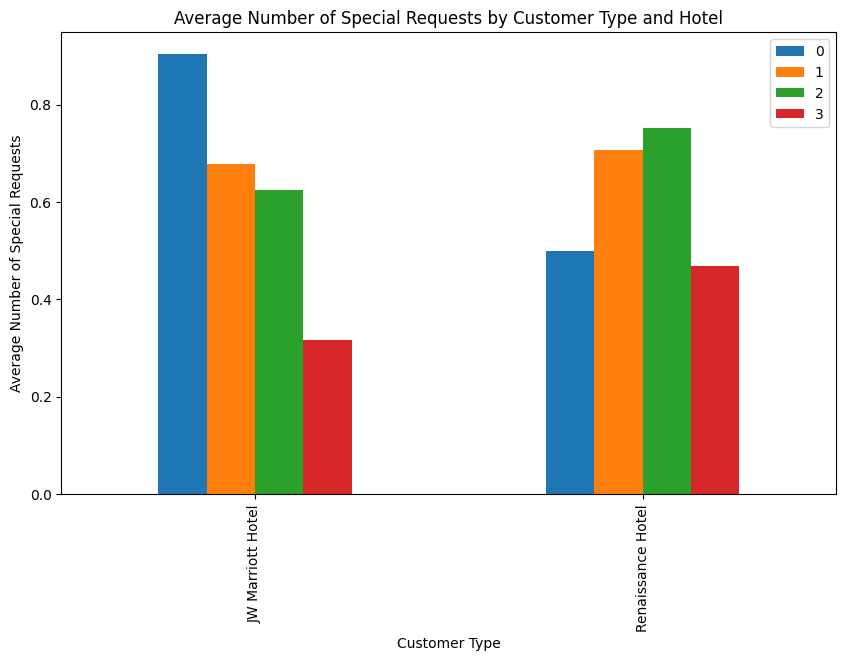

In [ ]:
# Group the data by hotel and customer type, calculate the average number of special requests
grouped_data = data.groupby(['hotel', 'customer_type'])['total_of_special_requests'].mean()

# Plot the grouped bar chart
grouped_data.unstack().plot(kind='bar', figsize=(10, 6))

# Set the axis labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Number of Special Requests')
plt.title('Average Number of Special Requests by Customer Type and Hotel')
plt.legend()
plt.show()

This graph will help the hotels identify which type of customers tend to have more special requests. The hotel will know how to serve different types customers and increase customer loyalty.

## Extra insight: What is the favourite room type for returning customers

We wil check the reserved room type, as that's what they initially wanted

In [ ]:
returning_customers = data[data['is_repeated_guest'] == 1]
# Count the occurrences of each room type among returning customers
room_type_counts = returning_customers['reserved_room_type'].value_counts()
room_type_counts

0    1147
3     165
4      70
5      25
6      18
7       8
2       7
1       4
Name: reserved_room_type, dtype: int64

## Extra insight: Which hotel has the most number of cancelations

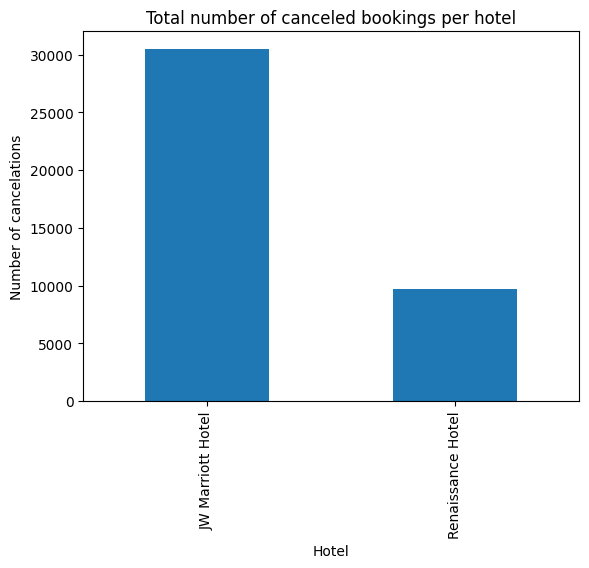

In [ ]:
no_of_canceled = data[data['is_canceled'] == 1].groupby('hotel').size()

no_of_canceled.plot(kind='bar')

plt.xlabel('Hotel')
plt.ylabel('Number of cancelations')
plt.title('Total number of canceled bookings per hotel')
plt.show()

It makes sense that JW would have more cancellations simply due to the fact that it has more reservations overall. We will develop this insight later.

# Sources
https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

https://stackoverflow.com/questions/39778686/pandas-reset-index-after-groupby-value-counts

https://www.w3schools.com/python/matplotlib_line.asp

https://stackoverflow.com/questions/62904946/pandas-groubpy-plotting-with-unstack

https://www.statology.org/pandas-groupby-plot/

https://towardsdatascience.com/seaborn-heatmap-for-visualising-data-correlations-66cbef09c1fe


# Queries

In [ ]:
# Installing required packages
!pip install pyspark
!pip install findspark


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import findspark
findspark.init()

In [ ]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
# clean_df = pd.read_csv('cleaned.csv')
sdf = spark.createDataFrame(data)

In [ ]:
sdf.printSchema()

root
 |-- Unnamed: 0: long (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: long (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: long (nullable = true)
 |-- country: long (nullable = true)
 |-- distribution_channel: long (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: long (nullable = true)
 |-- assigned_room_type: long (nullable = true)
 |-- booking_changes: long (nullable = true

In [ ]:
sdf.show(10)

+----------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+
|Unnamed: 0|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_special_requests|
+----------+-----------------+--

In [ ]:
sdf.createOrReplaceTempView("hotels_table")

# JW Promotion 1

Families who have at least a child and a baby will recieve a discount

In [ ]:
spark.sql("SELECT COUNT(*) AS eligible_family_bookings, AVG(adr) FROM hotels_table WHERE hotel == 'JW Marriott Hotel' AND (children > 0 AND babies > 0 AND adults > 0)").show()

+------------------------+------------------+
|eligible_family_bookings|          avg(adr)|
+------------------------+------------------+
|                      47|162.59765957446808|
+------------------------+------------------+



# JW Promotion 2

Loyal customers will recieve a discount. Customers are loyal if they booked from the same hotel before.

In [ ]:
spark.sql("SELECT COUNT(*) AS loyal_customers FROM hotels_table WHERE hotel == 'JW Marriott Hotel' AND is_repeated_guest == 1").show()

+---------------+
|loyal_customers|
+---------------+
|            717|
+---------------+



# JW Promotion 3

Summer holiday promotion for customers staying for at least 2 weeks

In [ ]:
spark.sql("SELECT COUNT(*) AS two_week_stay_summer_bookings FROM hotels_table WHERE hotel == 'JW Marriott Hotel' AND arrival_date_month IN (5, 6, 7) AND (stays_in_weekend_nights + stays_in_week_nights >= 14)").show()

+-----------------------------+
|two_week_stay_summer_bookings|
+-----------------------------+
|                           49|
+-----------------------------+



# Renaissance Promotion 1

Organaize a festival/event for the hotel members during the most popular booking months

In [ ]:
# Query the total number of bookings for each month so that the hotel can organize the festival/event in the month with highest bookings
spark.sql("SELECT COUNT(*) AS no_of_bookings, arrival_date_month FROM hotels_table WHERE hotel == 'Renaissance Hotel' GROUP BY arrival_date_month ORDER BY no_of_bookings DESC").show()

+--------------+------------------+
|no_of_bookings|arrival_date_month|
+--------------+------------------+
|          4351|                 1|
|          4036|                 5|
|          2886|                 0|
|          2879|                 8|
|          2640|                 6|
|          2578|                11|
|          2395|                10|
|          2389|                 7|
|          2268|                 3|
|          1959|                 2|
|          1884|                 9|
|          1448|                 4|
+--------------+------------------+



Hotel can organize events at February and June as they have the highest number of bookings

# Renaissance Promotion 2

Promote the least booked meal

In [ ]:
# Query the least booked meal
spark.sql("SELECT COUNT(*) AS no_of_bookings, meal FROM hotels_table WHERE hotel == 'Renaissance Hotel' GROUP BY meal ORDER BY no_of_bookings ASC").show()

+--------------+----+
|no_of_bookings|meal|
+--------------+----+
|            50|   3|
|           635|   1|
|           830|   4|
|          7120|   2|
|         23078|   0|
+--------------+----+



# Renaissance Promotion 3

Flexible booking experience. Allow customers the flexibility to modify their bookings without additional fees or any conflict.

In [ ]:
spark.sql("SELECT AVG(booking_changes) AS average_booking_changes FROM hotels_table WHERE hotel == 'Renaissance Hotel' AND booking_changes > 0 ").show()

+-----------------------+
|average_booking_changes|
+-----------------------+
|     1.4628469113697404|
+-----------------------+



# Machine Learning

## Multilayer Perceptron Neural Networks

In [ ]:
!pip install pyspark


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score

spark = SparkSession.builder.appName('hotels').getOrCreate()
df = spark.read.csv('cleaned.csv', header = True, inferSchema = True)
df.printSchema()

# initialization source is the lab (3 - Mobile Price Prediction Solution (Assignment solution))

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: integer (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- distribution_channel: integer (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: integer (nullable = true)
 |-- assigned_room_type: integer (nul

In [ ]:
# to fix the next line of code's would-be error (IllegalArgumentException: Data type string of column hotel is not supported.
# Data type date of column arrival_date is not supported.), we need to handle hotel & arrival_date columns:

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Convert the 'hotel' column from string to numeric
stringIndexer = StringIndexer(inputCol='hotel', outputCol='hotel_index')
indexed = stringIndexer.fit(df).transform(df)

# Convert the 'arrival_date' column to timestamp
# indexed = indexed.withColumn('arrival_date', to_timestamp('arrival_date', 'yyyy-MM-dd'))

In [ ]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

# here we have to take the input parameters which are the 28 input columns, and label them under the umbrella of 'features'

vectorAssembler = VectorAssembler(inputCols = ['hotel_index','arrival_date_year','arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month' ,'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
'babies', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces',
'total_of_special_requests'], outputCol = 'features')
v_hotel_df = vectorAssembler.transform(indexed)
v_hotel_df.show(5)

+----------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+-----+---------------------------+-------------------------+-----------+--------------------+
|Unnamed: 0|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|  adr|required_car_parking_spaces|total_of_special_requests|ho

In [ ]:
# the same thing is done here but labeling the output 'Spam' column as label (our y value)
indexer = StringIndexer(inputCol = 'is_canceled', outputCol = 'label')
i_v_hotel_df = indexer.fit(v_hotel_df).transform(v_hotel_df)
i_v_hotel_df.show(5)

+----------+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+-----+---------------------------+-------------------------+-----------+--------------------+-----+
|Unnamed: 0|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|  adr|required_car_parking_spaces|total_of_special_reque

In [ ]:
i_v_hotel_df.select('is_canceled','label').groupBy('is_canceled','label').count().show()
# just making sure this labeling system worked and that there are no stray values

+-----------+-----+-----+
|is_canceled|label|count|
+-----------+-----+-----+
|          0|  0.0|62733|
|          1|  1.0|40161|
+-----------+-----+-----+



In [ ]:
splits = i_v_hotel_df.randomSplit([0.8,0.2],1)
train_df = splits[0]
test_df = splits[1]
train_df.count(), test_df.count(), i_v_hotel_df.count()

# classic 80(training)/20(testing) split

(82364, 20530, 102894)

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
layers = [27,14,4,2]
# a = 27 because the other 1 column contains the output column (is_canceled)
# b = 2 because it's either yes (cancelled) or no

mlp = MultilayerPerceptronClassifier(layers = layers, seed = 1)
mlp_model = mlp.fit(train_df)

pred_df = mlp_model.transform(test_df)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'accuracy')
mlpacc = evaluator.evaluate(pred_df)
mlpacc
# metric name is apparently case sensitive so it can't be written 'Accuracy' and has to be 'accuracy'

0.695859717486605

Sources:
https://medium.com/swlh/pysparks-multi-layer-perceptron-classifier-on-iris-dataset-dcf70d553cd8
3 - Mobile Price Prediction Solution (Assignment solution)
https://community.databricks.com/s/question/0D53f00001HKHmYCAX/attributeerror-dataframe-object-has-no-attribute-rename

## Decision Tree Classifier

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score

spark = SparkSession.builder.appName('hotels').getOrCreate()
df = spark.read.csv('cleaned.csv', header = True, inferSchema = True)
df.printSchema()

# initialization source is the lab (3 - Mobile Price Prediction Solution (Assignment solution))

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: integer (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- distribution_channel: integer (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: integer (nullable = true)
 |-- assigned_room_type: integer (nul

In [ ]:
# to fix the next line of code's would-be error (IllegalArgumentException: Data type string of column hotel is not supported.
# Data type date of column arrival_date is not supported.), we need to handle hotel & arrival_date columns:

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Convert the 'hotel' column from string to numeric
stringIndexer = StringIndexer(inputCol='hotel', outputCol='hotel_index')
indexed = stringIndexer.fit(df).transform(df)

# Convert the 'arrival_date' column to timestamp
# indexed = indexed.withColumn('arrival_date', to_timestamp('arrival_date', 'yyyy-MM-dd'))

Every column, including the label, must be numeric.

In [ ]:
# Define the input columns
inputCols = ['hotel_index','arrival_date_year','arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month' ,'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
'babies', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces',
'total_of_special_requests']

In [ ]:
# Transform the input columns into a feature column
vectorAssembler = VectorAssembler(inputCols=inputCols, outputCol='features')
indexed = vectorAssembler.transform(indexed)

In [ ]:
# Split the data into training and test sets
(trainingData, testData) = indexed.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Define the DecisionTreeClassifier
dtc = DecisionTreeClassifier(labelCol='is_canceled', featuresCol='features', maxDepth=5)

In [ ]:
pipeline = Pipeline(stages=[dtc])
model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)

In [ ]:
# Evaluate the model using accuracy metric
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy:', accuracy)

Accuracy: 0.7493434490808287


5% increase in accuracy from last model!

Sources: pyspark ml classification DecisionTreeClassifier. https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html

## Gradient-Boosted Tree Classifier

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score

spark = SparkSession.builder.appName('hotels').getOrCreate()
df = spark.read.csv('cleaned.csv', header = True, inferSchema = True)
df.printSchema()

# initialization source is the lab (3 - Mobile Price Prediction Solution (Assignment solution))

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: integer (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- distribution_channel: integer (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: integer (nullable = true)
 |-- assigned_room_type: integer (nul

In [ ]:
# to fix the next line of code's would-be error (IllegalArgumentException: Data type string of column hotel is not supported.
# Data type date of column arrival_date is not supported.), we need to handle hotel & arrival_date columns:

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Convert the 'hotel' column from string to numeric
stringIndexer = StringIndexer(inputCol='hotel', outputCol='hotel_index')
indexed = stringIndexer.fit(df).transform(df)

# Convert the 'arrival_date' column to timestamp
# indexed = indexed.withColumn('arrival_date', to_timestamp('arrival_date', 'yyyy-MM-dd'))

In [ ]:
# Define the input columns
inputCols = ['hotel_index','arrival_date_year','arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month' ,'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
'babies', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces',
'total_of_special_requests']

In [ ]:
# Transform the input columns into a feature column
vectorAssembler = VectorAssembler(inputCols=inputCols, outputCol='features')
indexed = vectorAssembler.transform(indexed)

In [ ]:
# Split the data into training and test sets

(trainingData, testData) = indexed.randomSplit([0.8, 0.2])


In [ ]:
from pyspark.ml.classification import GBTClassifier

# Train a Gradient-Boosted Tree Classifier
gbt = GBTClassifier(featuresCol='features', labelCol='is_canceled', maxIter=10)
gbt_model = gbt.fit(trainingData)

In [ ]:
# Make predictions on the test data
predictions = gbt_model.transform(testData)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator3 = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator3.evaluate(predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8222921171613918


Highest accuracy!

Sources:  pyspark ml classification GBTClassifier: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.GBTClassifier.html

https://towardsdatascience.com/understanding-how-a-gradient-boosted-tree-does-binary-classification-c215967600fe

https://www.geeksforgeeks.org/pyspark-randomsplit-and-sample-methods/